In [24]:
# bringing in modules, os for path routing, pandas to read and export csv and matplotlib to create plots
import os
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# reading in csv files with pandas and assigning those to variables 
# referencing the country column in china inflation rates and filtering by country = China
Annual_Gold_Value_In_Yen = pd.read_csv("Resources/output_Annual_Gold_Value_In_Yen.csv")
inflation_rates = pd.read_csv("Resources/inflation_rates_2013-2021.csv")
China_inflation_rates = inflation_rates[inflation_rates['country'] == 'China']
China_inflation_rates = inflation_rates[inflation_rates['country'] == 'China']

In [26]:
# inner joining both dataframes on year columns
# DataFrame.cumprod() is a method in pandas that computes the cumulative product of the elements along a specified axis in a DataFrame.
# creating a new column called 'Adjusted_Gold_Value_In_Yen' that calculates the cumulative inflation factor and applies it to the starting gold value to derive the adjusted gold values over time.
# dropping un needed columns -- maybe could have included year into the first drop
merged_data = pd.merge(Annual_Gold_Value_In_Yen, China_inflation_rates, left_on='Year', right_on='year', how='inner')
starting_gold_value = merged_data['Gold_Value_In_Yen'].iloc[0]
merged_data['Adjusted_Gold_Value_In_Yen'] = starting_gold_value * (1 + merged_data['inflation rate'] / 100).cumprod()
merged_data.drop(columns=['country', 'currency', 'inflation rate'], inplace=True)
merged_data.drop(columns=['year'], inplace=True)

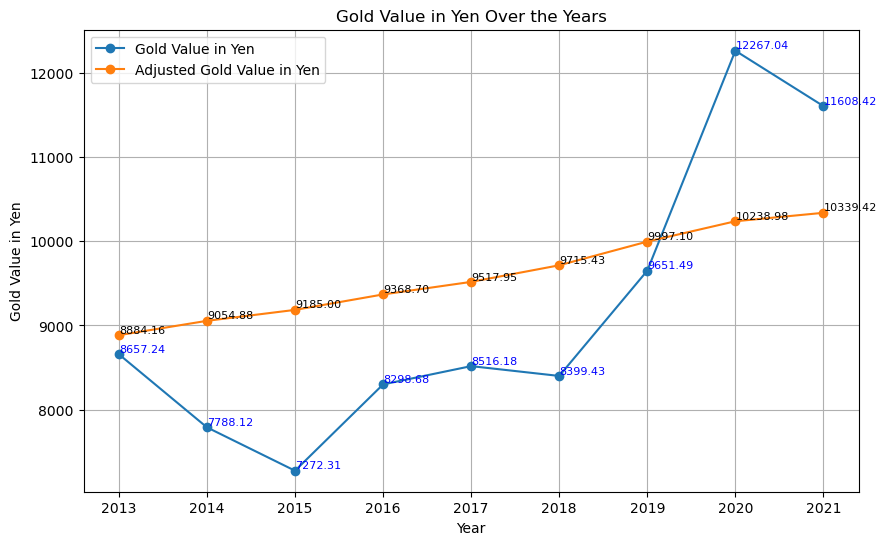

In [27]:
# plotting data to show cumulative gold value vs inflation over time in values and not %
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['Gold_Value_In_Yen'], label='Gold Value in Yen', marker='o')
plt.plot(merged_data['Year'], merged_data['Adjusted_Gold_Value_In_Yen'], label='Adjusted Gold Value in Yen', marker='o') 
for year, gold_value, adjusted_value in zip(merged_data['Year'], merged_data['Gold_Value_In_Yen'], merged_data['Adjusted_Gold_Value_In_Yen']):
    plt.text(year, gold_value, f'{gold_value:.2f}', ha='left', va='bottom', fontsize=8, color='blue')
    plt.text(year, adjusted_value, f'{adjusted_value:.2f}', ha='left', va='bottom', fontsize=8, color='black')
plt.xlabel('Year')
plt.ylabel('Gold Value in Yen')
plt.title('Gold Value in Yen Over the Years')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('Plotted Charts', 'ChinaYenCurrency.png'))
plt.show()